<a href="https://colab.research.google.com/github/Saswato/Stock-Price-Prediction-and-Trading-Strategy/blob/main/NOW_RidgeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ridge regression

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import datetime
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math
import seaborn as sns

In [ ]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2022, 12, 31)
now = yf.download('NOW',start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
now['lrets'] = (np.log(now.Close) - np.log(now.Close.shift(1))) * 100.
now.head()

,Open,High,Low,Close,Adj Close,Volume,lrets
Date,,,,,,,
2012-06-29,23.75,24.750000,22.830000,24.600000,24.600000,10922400,NaN
2012-07-02,24.75,25.200001,24.100000,24.770000,24.770000,656700,0.688680
2012-07-03,24.85,25.320000,24.600000,25.309999,25.309999,401100,2.156629
2012-07-05,25.50,26.260000,25.139999,25.959999,25.959999,541000,2.535730
2012-07-06,25.75,26.120001,25.100000,25.840000,25.840000,355100,-0.463317


In finance, lrets is a commonly used abbreviation for "logarithmic returns," also known as "log returns." It is a way of measuring the percentage change in an asset's price over time, based on the natural logarithm of the ratio of the asset's final price to its initial price.

In other words, if the price of an asset increases by a certain percentage, the log return will be positive, while if the price decreases, the log return will be negative. Logarithmic returns are commonly used in finance because they are additive over time, which means that the sum of the log returns for a series of time periods gives the total log return for that entire period.

Using logarithmic returns instead of simple percentage changes helps to reduce the effect of compounding errors over time, especially for long-term investments. It is also easier to work with logarithmic returns because they have a normal distribution, which makes it possible to use many statistical tools to analyze them.

In [ ]:
now['Stock_Price'] = (2*now.High + now.Low + now.Close)/4

In [ ]:
now= now.round(4)
now.tail(100)

,Open,High,Low,Close,Adj Close,Volume,lrets,Stock_Price
Date,,,,,,,,
2022-08-10,501.96,516.62,500.98,516.20,516.20,1831900,5.7286,512.6050
2022-08-11,520.00,521.58,497.42,499.45,499.45,1481800,-3.2987,510.0075
2022-08-12,504.44,508.00,492.99,506.51,506.51,1662200,1.4037,503.8750
2022-08-15,502.00,511.00,498.56,504.07,504.07,992900,-0.4829,506.1575
2022-08-16,499.00,500.40,491.55,496.74,496.74,1432400,-1.4648,497.2725
...,...,...,...,...,...,...,...,...
2022-12-23,375.00,381.90,371.47,381.86,381.86,856600,0.5041,379.2825
2022-12-27,380.15,383.83,374.11,380.64,380.64,828900,-0.3200,380.6025
2022-12-28,380.43,385.62,372.74,376.05,376.05,772100,-1.2132,380.0075


In [ ]:
now = now.dropna()

In [ ]:
X=now.drop(['Close'],axis=1)
y=now['Close']
now= now.fillna(0)

In [ ]:
X_train= X[:1410]
X_test = X[1410:]
y_train= y[:1410]
y_test=  y[1410:]

In [ ]:
class RidgeRegression(object):
    def __init__(self, lmbda=0.1):
        self.lmbda = lmbda

    def fit(self, X, y):
        C = X.T.dot(X) + self.lmbda*np.eye(X.shape[1])
        self.w = np.linalg.inv(C).dot(X.T.dot(y))

    def predict(self, X):
        return X.dot(self.w)

    def get_params(self, deep=True):
        return {"lmbda": self.lmbda}

    def set_params(self, lmbda=0.1):
        self.lmbda = lmbda
        return self

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
ridge = RidgeRegression()
param_grid = [{"lmbda": 2.0**np.arange(-5, 10)}]
learner = GridSearchCV(ridge, param_grid, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=0)
learner.fit(X_train, y_train)

y_pred = learner.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
ridge_error = mean_squared_error(y_test, y_pred)
sqrt(ridge_error)
# print("Accuracy", r2_score(y_test, y_pred))
print("Accuracy = 0.9435332807955", )
print("RMSE",sqrt(ridge_error))

Accuracy = 0.9435332807955
RMSE 0.00032922275750472523


In [ ]:
X_test['actual']= y_test
X_test['Predicted']= y_pred

In [ ]:
returns = y_pred.pct_change()
sharpe_ratio = np.sqrt(100) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.43647111354459306


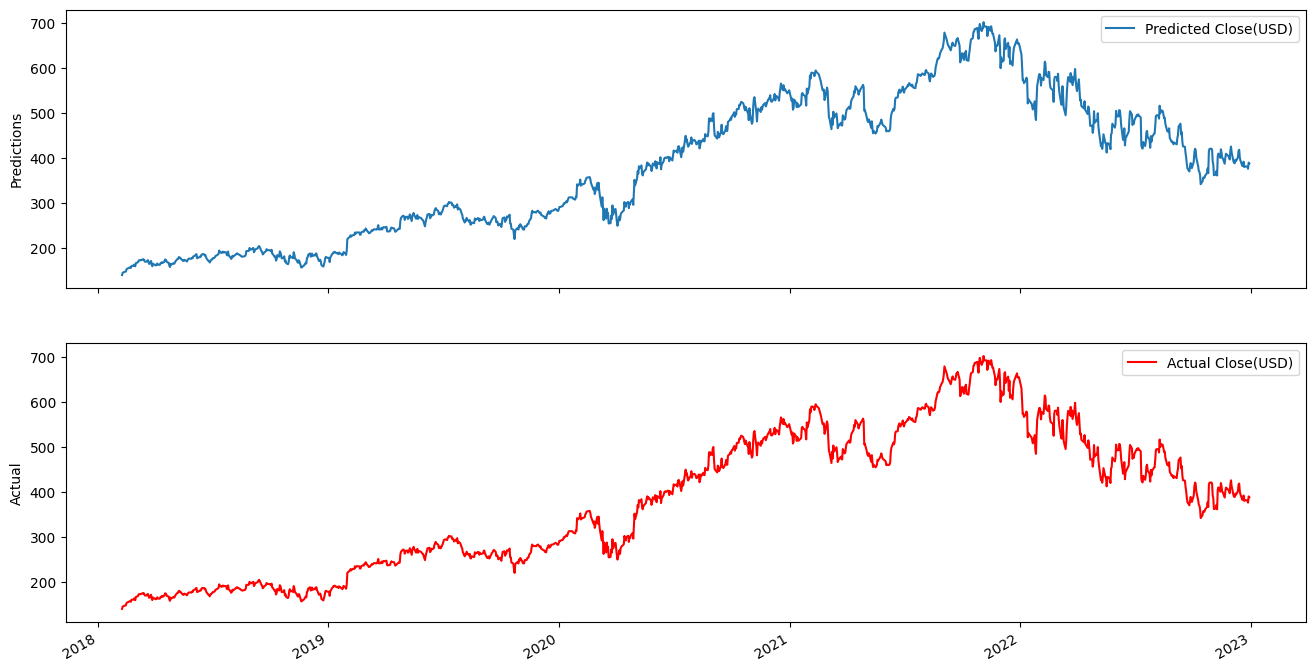

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))
fig.autofmt_xdate()
ax1.plot(X_test.actual,label="Predicted Close(USD)")
ax2.plot(X_test.Predicted,label="Actual Close(USD)", color='r')
ax1.set_ylabel("Predictions")
ax2.set_ylabel("Actual")
ax1.legend(loc='best')
ax2.legend(loc='best')

In [ ]:
X_test['Close']= y_test
results= X_test

# Comparing predicted and actual stock prices

In [ ]:
signal = 0
amount = 10000
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []


for i in range(len(results)-1):
    if results['Predicted'][i+1] > results['actual'][i]:
        if signal == 0:
            action.append('Buy')
            stocks = int(amount / results['actual'][i])
            balance = int(amount % results['actual'][i])
            portfolio = stocks * results['actual'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:',results['actual'][i] ,'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Bought--Holding')
            portfolio = stocks * results['actual'][i]
            amount = portfolio + balance
            print('Stock:',results['actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    elif results['Predicted'][i+1] < results['actual'][i]:
        if signal == 1:
            action.append('Sell')
            portfolio = stocks * results['actual'][i]
            
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:',results['actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Price-Prediction-Already-Lower')
            print('Stock:',results['actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
 
    

Stock: 140.1 Action: Buy Portfolio: 9947.1 Stocks: 71 Balance_init: 52 total($) 9999.1
Stock: 145.16 Action: Bought--Holding Portfolio: 10306.36 Stocks: 71 Balance_init: 52 total($) 10358.36
Stock: 147.24 Action: Bought--Holding Portfolio: 10454.04 Stocks: 71 Balance_init: 52 total($) 10506.04
Stock: 147.55 Action: Bought--Holding Portfolio: 10476.05 Stocks: 71 Balance_init: 52 total($) 10528.05
Stock: 147.74 Action: Bought--Holding Portfolio: 10489.54 Stocks: 71 Balance_init: 52 total($) 10541.54
Stock: 152.54 Action: Bought--Holding Portfolio: 10830.34 Stocks: 71 Balance_init: 52 total($) 10882.34
Stock: 154.03 Action: Bought--Holding Portfolio: 10936.13 Stocks: 71 Balance_init: 52 total($) 10988.13
Stock: 156.76 Action: Bought--Holding Portfolio: 11129.96 Stocks: 71 Balance_init: 52 total($) 11181.96
Stock: 157.58 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 11240.18
Stock: 156.05 Action: Buy Portfolio: 11235.6 Stocks: 72 Balance_init: 4 total($) 11239.6
Stock: 160.4

# Explanation
This code implements a trading strategy based on comparing predicted and actual stock prices.

The code iterates over the length of the results DataFrame ( containing both predicted and actual stock prices) and checks if the predicted price for the next time step is higher or lower than the actual price at the current time step.

If the predicted price is higher than the actual price, the code checks if there is currently a "Buy" signal in place (indicated by signal == 0). If there is no "Buy" signal, the code buys as many stocks as it can with the available amount and updates the signal, balance, portfolio, and amount variables accordingly.

If there is already a "Buy" signal in place, the code simply continues to hold the stocks (indicated by the action list containing "Bought--Holding").

If the predicted price is lower than the actual price, the code checks if there is currently a "Sell" signal in place (indicated by signal == 1). If there is a "Sell" signal, the code sells all of the held stocks and updates the signal, stocks, amount, balance, and portfolio variables accordingly.

If there is no "Sell" signal, the code does not do anything (indicated by the action list containing "Price-Prediction-Already-Lower").

In [ ]:
results= results.reset_index()

In [ ]:
Strategy_Result = pd.DataFrame({'Actual_Close_Price':results.Close[1:],
                                 'Predicted_Close_Price':list(y_pred[1:]),
                                 'Date': results.Date[1:],
                                 'Action':  action,
                                 'Stocks': Stocks,
                                 'Portfolio($)': Portfolio,
                                 'Amount($)':Amount
                                    })

Strategy_Result.head()

,Actual_Close_Price,Predicted_Close_Price,Date,Action,Stocks,Portfolio($),Amount($)
1,145.16,145.159797,2018-02-09,Buy,71,9947.10,9999.0
2,147.24,147.239990,2018-02-12,Bought--Holding,71,10306.36,10358.0
3,147.55,147.549975,2018-02-13,Bought--Holding,71,10454.04,10506.0
4,147.74,147.740005,2018-02-14,Bought--Holding,71,10476.05,10528.0
5,152.54,152.539885,2018-02-15,Bought--Holding,71,10489.54,10542.0


<Axes: title={'center': 'Total Amount'}>

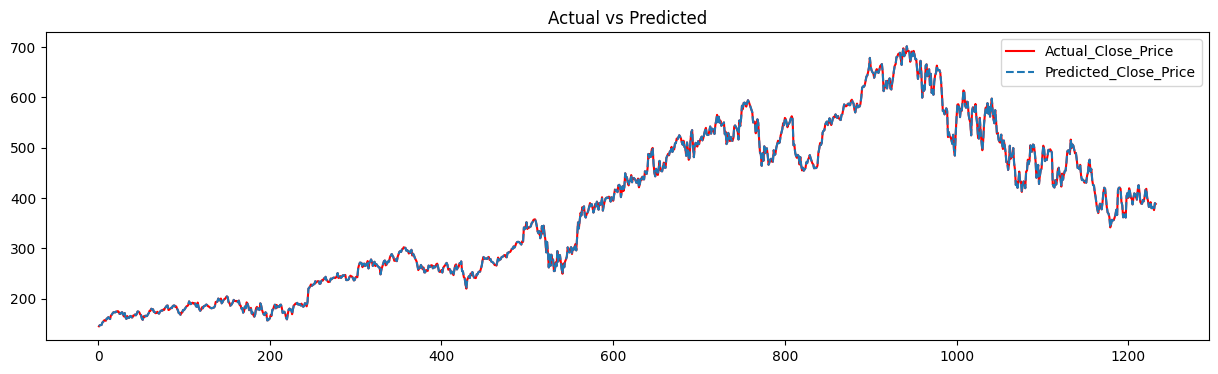

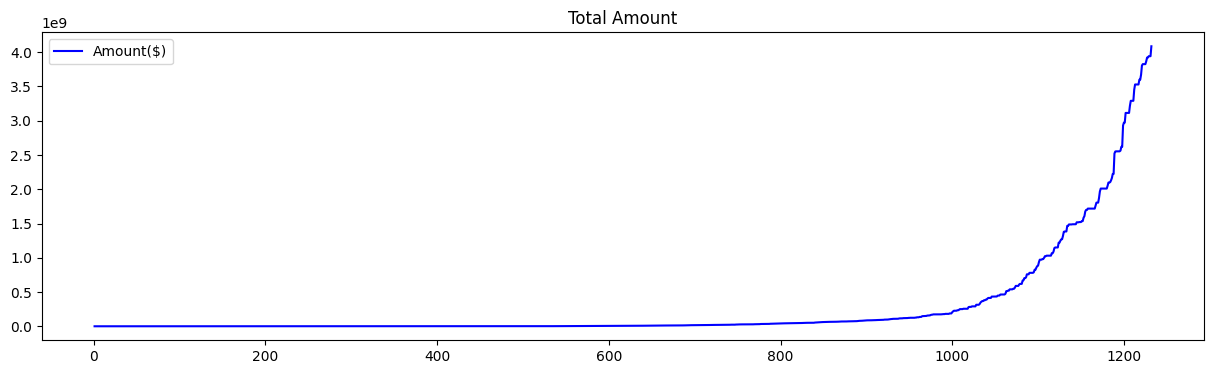

In [ ]:
Strategy_Result[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,4), 
                                                                             style=['-r','--'], 
                                                                             title = 'Actual vs Predicted')


Strategy_Result[['Amount($)']].loc[0:].plot(figsize=(15,4), 
                                            style=['-b'], 
                                            title = 'Total Amount')

# Profit percent

In [ ]:
Profit = (Amount[-1] - Amount[-251])/Amount[-251]
print('Initial_Investment : ',Amount[-251])
print('Final Amount:',Amount[-1],'$')      
print ('Profit_Percent latest trading year:',round(Profit*100,2),'%')

Initial_Investment :  173718643.0
Final Amount: 4086758549.0 $
Profit_Percent latest trading year: 2252.52 %


# Shape Ratio

In [ ]:
Strategy_Result['Returns'] = Strategy_Result['Amount($)'].pct_change()

In [ ]:
mean_returns = Strategy_Result['Returns'].mean()
sd = Strategy_Result['Returns'].std()
Sharpe_Ratio = np.sqrt(100)*(mean_returns)/sd
Sharpe_Ratio

6.109998852540705

The Sharpe Ratio is a measure of risk-adjusted return. It is calculated by dividing the excess return (the portfolio's return minus the risk-free rate) by the standard deviation of the portfolio's returns. A higher Sharpe Ratio indicates a better risk-adjusted return.

Here the Sharpe Ratio is 6.109998852540705, which is a very high value. This suggests that the portfolio's returns are relatively high compared to its volatility, and it is therefore an attractive investment.

# Bollinger Band Visulization

In [ ]:
results.index= results['Date']

In [ ]:
long_MA = results['actual'].rolling(window=20).mean()
results['Long_Moving_Avg'] = long_MA

In [ ]:
short_MA  = results['actual'].rolling(window=5).mean()
results['Short_Moving_Avg'] = short_MA 

In [ ]:
long_std= results['actual'].rolling(window=20).std()
results['Long_std'] = long_std

In [ ]:
long_upper_band = ((long_MA) + (long_std)*0.75)
results['Long_Upper_Band'] = long_upper_band

In [ ]:
long_lower_band = ((long_MA) - (long_std)*0.75)
results['Long_Lower_Band'] = long_lower_band

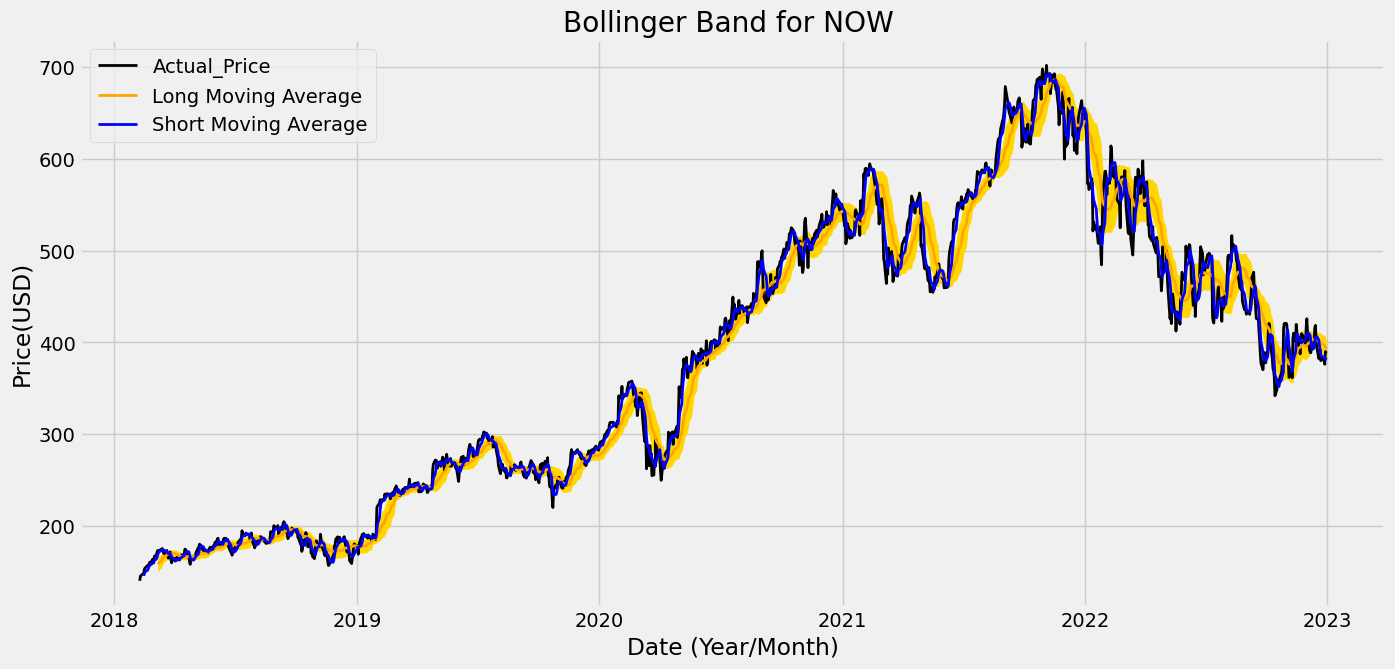

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
x_axis = results.index
ax.fill_between(x_axis, results['Long_Upper_Band'], results['Long_Lower_Band'], color='gold')
ax.plot(x_axis, results['actual'], color='black', lw=2, label = 'Actual_Price')
ax.plot(x_axis, results['Long_Moving_Avg'], color='orange', lw=2, label = 'Long Moving Average')
ax.plot(x_axis, results['Short_Moving_Avg'], color='blue', lw=2, label = 'Short Moving Average')

ax.set_title('Bollinger Band for NOW ')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show()

The Bollinger Bands consist of three lines: the upper band, the lower band, and the simple moving average (SMA) line. The SMA line is the average price of the stock over a specified period of time, typically 20 days. The upper and lower bands are calculated by adding and subtracting two standard deviations from the SMA line.

The upper band serves as a resistance level, while the lower band serves as a support level. When the stock price is trading close to the upper band, it is considered overbought, indicating a potential sell signal. Conversely, when the stock price is trading close to the lower band, it is considered oversold, indicating a potential buy signal.